<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.

In [72]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import warnings
warnings.filterwarnings('ignore')

### **Task 1 - Read the dataset in the csv file from the URL**


In [74]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [75]:
boston_df=pd.read_csv(boston_url)
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [76]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.4 KB


In [77]:
boston_df = boston_df.drop(boston_df.columns[0], axis = 1)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


#### Significance of removing index columns
This unnamed:0 column was an index column, it should be removed to avoid duplications in our dataset.

In [78]:
boston_df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
LSTAT      0
MEDV       0
dtype: int64

#### Significance of checking NaN values
This ensures that missing data doesn't lead to inaccurate analysis or biased results and there is no missing data.

## **Task 2 - Descriptive Statistics and Visualizations**

### 1) Boxplot for Median Value of Owner-Occupied Homes (MEDV)

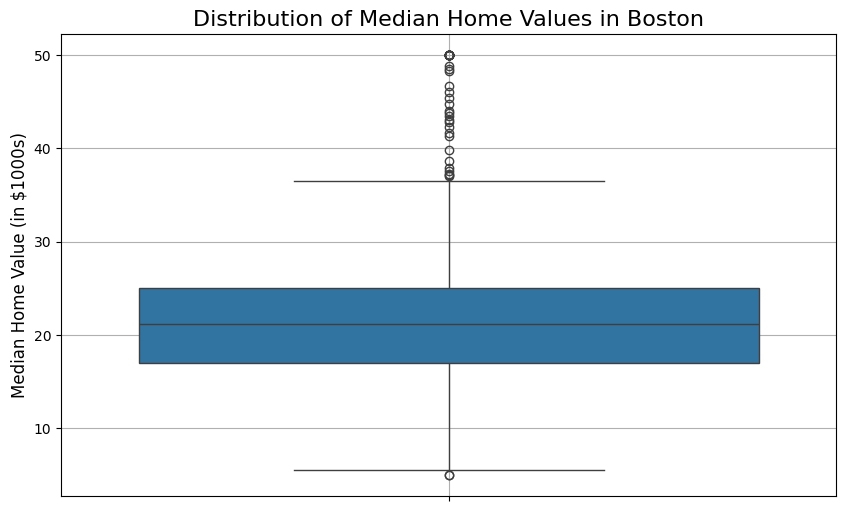

In [79]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=boston_df['MEDV'])
plt.title('Distribution of Median Home Values in Boston', fontsize=16)
plt.ylabel('Median Home Value (in $1000s)', fontsize=12)
plt.grid(True)
plt.show()

### Summary of the box plot
* The median value is approximately 22,000 dollars. 
* A significant number of outliers are visible, with some homes reaching values above 50,000. 
* The range of typical home values lies between 17,000 and 30,000.

### 2) Bar Plot for Charles River Variable (CHAS):

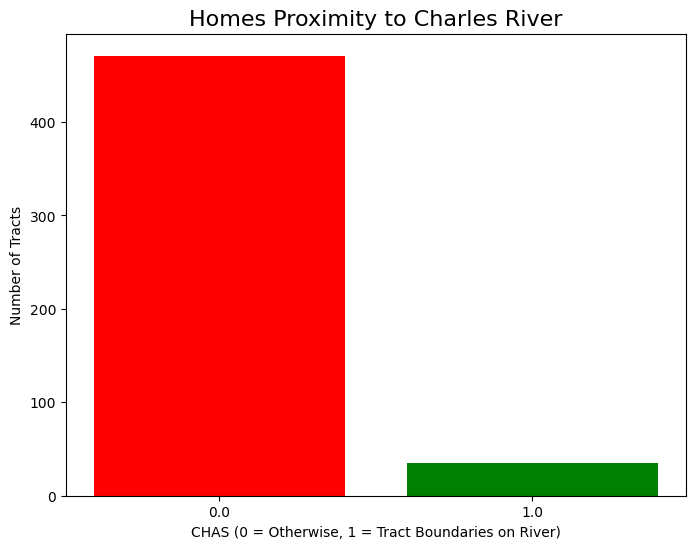

In [80]:
plt.figure(figsize=(8, 6))
chas_counts = boston_df['CHAS'].value_counts()
plt.bar(chas_counts.index, chas_counts.values, color=['red', 'green'])
plt.title('Homes Proximity to Charles River', fontsize=16)
plt.xlabel('CHAS (0 = Otherwise, 1 = Tract Boundaries on River)', fontsize=10)
plt.ylabel('Number of Tracts', fontsize=10)
plt.xticks([0, 1], ['0.0', '1.0'])
plt.show()

### Summary of the bar plot
* Approximately 35 homes are near the Charles river. 
* Roughly 400 homes are not near the Charles river. 
* **Riverfront properties  are scarce in the dataset**.

### 3) Boxplot for MEDV vs AGE (Discretize AGE into three groups: <=35, 35-70, >70)

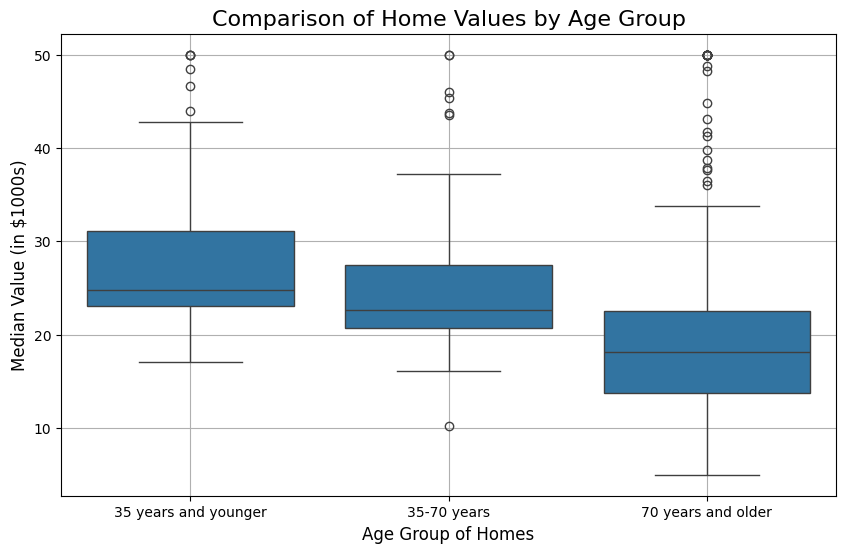

In [81]:
age_bins = [0, 35, 70, boston_df['AGE'].max()]
age_labels = ['35 years and younger', '35-70 years', '70 years and older']
boston_df['Age Group'] = pd.cut(boston_df['AGE'], bins=age_bins, labels=age_labels, include_lowest=True)

plt.figure(figsize=(10, 6))
sns.boxplot(x='Age Group', y='MEDV', data=boston_df)
plt.title('Comparison of Home Values by Age Group', fontsize=16)
plt.xlabel('Age Group of Homes', fontsize=12)
plt.ylabel('Median Value (in $1000s)', fontsize=12)
plt.grid(True)
plt.show()

#### Summary of the Boxplot for MEDV vs Age
* Homes aged 35 years or younger have a higher median value, with values ranging from 20,000 dollars to 35,000 dollars.
* Homes between 35 and 70 years have a slightly lower median.
* The lowest median values are observed in homes older than 70 years.
* Outliers are visible in all age groups ranging from 35,000 dollars to 50000 dollars.
* This boxplot suggests that newer homes (35 years and younger) tend to be more desirable, with higher median values, supporting the idea that people may prefer to purchase newer homes.

### 4) Scatter Plot for Nitric Oxide Concentration (NOX) vs Non-Retail Business Acres (INDUS):

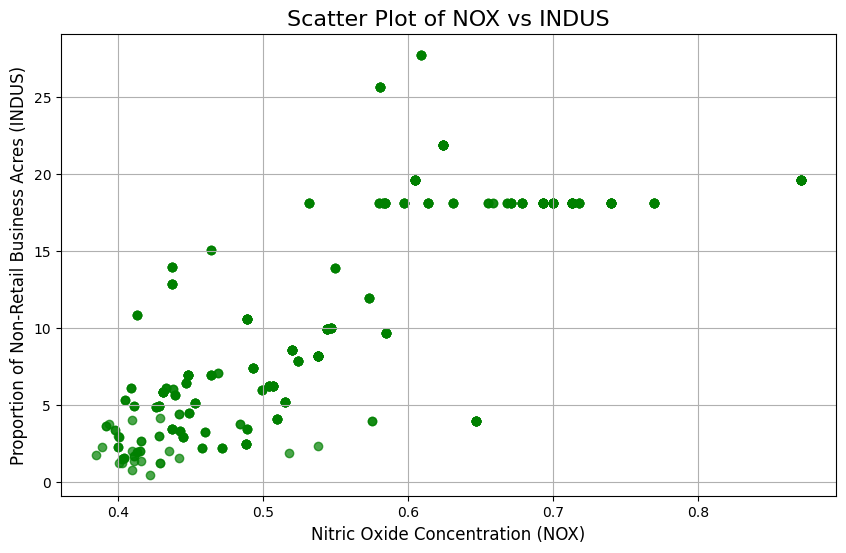

In [82]:
plt.figure(figsize=(10, 6))
plt.scatter(boston_df['NOX'], boston_df['INDUS'], alpha=0.7, color='green')
plt.title('Scatter Plot of NOX vs INDUS', fontsize=16)
plt.xlabel('Nitric Oxide Concentration (NOX)', fontsize=12)
plt.ylabel('Proportion of Non-Retail Business Acres (INDUS)', fontsize=12)
plt.grid(True)
plt.show()

#### Summary of the scatter plot

* The relationship between NOX and INDUS appears to be non-linear.
* There is a positive correlation at lower levels of NOX.
* At higher levels of NOX, there is more scattered and horizontal distribution which concludes that their relationship has weakened.

### 5) Histogram for Pupil-to-Teacher Ratio:

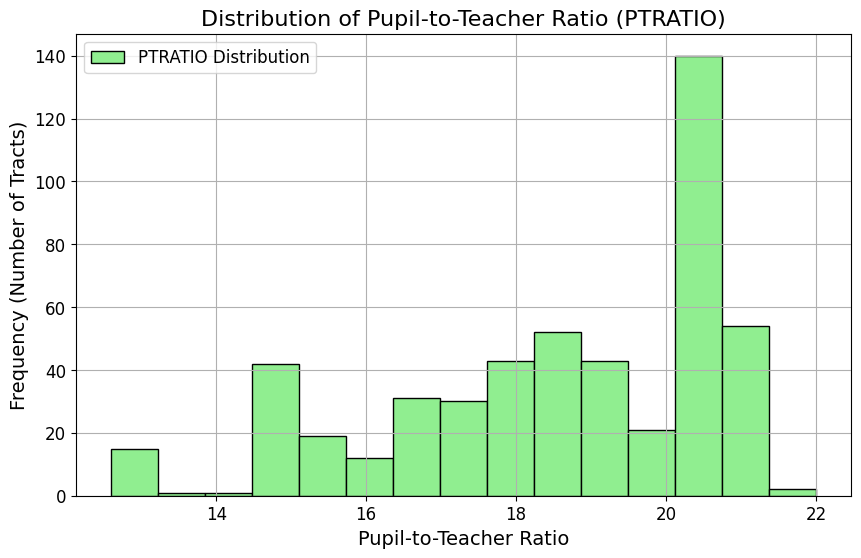

In [83]:
plt.figure(figsize=(10, 6))
plt.hist(boston_df['PTRATIO'], bins=15, color='lightgreen', edgecolor='black')
plt.title('Distribution of Pupil-to-Teacher Ratio (PTRATIO)', fontsize=16)
plt.xlabel('Pupil-to-Teacher Ratio', fontsize=14)
plt.ylabel('Frequency (Number of Tracts)', fontsize=14)
plt.grid(True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(['PTRATIO Distribution'], fontsize=12)
plt.show()

#### Summary of the histogram for PTRatio
* The pupil-to-teacher ratio (PTRATIO) in Boston neighborhoods generally ranges between 15 and 22, with the highest frequency (140 neighborhoods) falling between 20 and 21 range.
* Most neighborhoods have a pupil-to-teacher ratio around 20, which may indicate the city's tendency toward maintaining manageable class sizes across a large number of districts.
* The PTRATIO values beyond 22 and below 14 occur less frequently, indicating fewer districts with higher ratios.

## **Task 3 - Statistical Tests**

### 1) T-Test: Is there a significant difference in median value of houses bounded by the Charles River?

#### Hypthosis generation
##### **Null Hypothesis(H₀):** There is no significant difference in the median value of houses bounded by the Charles River (CHAS = 1) compared to those that are not (CHAS = 0).
##### **Alternative Hypothesis (H₁):** There is a significant difference in the median value of houses bounded by the Charles River (CHAS = 1) compared to those that are not (CHAS = 0).

In [84]:
medv_river = boston_df[boston_df['CHAS'] == 1]['MEDV']
medv_non_river = boston_df[boston_df['CHAS'] == 0]['MEDV']

t_stat, p_val = stats.ttest_ind(medv_river, medv_non_river, equal_var=False)  # Assume unequal variance by default

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_val:.4f}")

alpha = 0.05

if p_val < alpha:
    print(f"As the p-value ({p_val:.4f}) is less than the significance level ({alpha}), we reject the null hypothesis.")
    print("Conclusion: There is a statistically significant difference in the median value of houses bounded by the Charles River.")
else:
    print(f"As the p-value ({p_val:.4f}) is greater than or equal to the significance level ({alpha}), we fail to reject the null hypothesis.")
    print("Conclusion: There is no statistically significant difference in the median value of houses bounded by the Charles River.")

T-statistic: 3.1133
P-value: 0.0036
As the p-value (0.0036) is less than the significance level (0.05), we reject the null hypothesis.
Conclusion: There is a statistically significant difference in the median value of houses bounded by the Charles River.


### 2) ANOVA: Is there a difference in median house values (MEDV) for different AGE groups?

#### Hypthosis generation
##### **Null Hypothesis(H₀):** There is no significant difference in median house values (MEDV) across different age groups of homes.
##### **Alternative Hypothesis (H₁):** There is a significant difference in median house values (MEDV) across different age groups of homes.

In [85]:
f_stat, p_val = stats.f_oneway(
    boston_df[boston_df['Age Group'] == '35 years and younger']['MEDV'],
    boston_df[boston_df['Age Group'] == '35-70 years']['MEDV'],
    boston_df[boston_df['Age Group'] == '70 years and older']['MEDV']
)

print(f"F-statistic: {f_stat:.4f}, P-value: {p_val:.4f}")

alpha = 0.05
if p_val < alpha:
    print(f"As the p-value ({p_val:.4f}) is less than the significance level ({alpha}), we reject the null hypothesis.")
    print("Conclusion: there is a significant difference in median house values for different AGE groups.")
else:
    print(f"As the p-value ({p_val:.4f}) is greater than or equal to the significance level ({alpha}), we fail to reject the null hypothesis.")
    print("Conclusion: there is no significant difference in median house values for different AGE groups.")

F-statistic: 36.4076, P-value: 0.0000
As the p-value (0.0000) is less than the significance level (0.05), we reject the null hypothesis.
Conclusion: there is a significant difference in median house values for different AGE groups.


### 3) Pearson Correlation: is there no relationship between NOX and INDUS?

#### Hypthosis generation
##### **Null Hypothesis(H₀):** There is no significant relationship between the levels of nitrogen oxides (NOX) and the proportion of non-retail business acres (INDUS).
##### **Alternative Hypothesis (H₁):** There is significant relationship between the levels of nitrogen oxides (NOX) and the proportion of non-retail business acres (INDUS).

In [86]:
corr, p_val = stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

print(f"Pearson correlation coefficient: {corr:.4f}, P-value: {p_val:.4f}")

alpha = 0.05

if p_val < alpha:
    print(f"As the p-value ({p_val:.4f}) is less than the significance level ({alpha}), we reject the null hypothesis.")
    print("Conclusion: There is a significant relationship between NOX and INDUS.")
else:
    print(f"As the p-value ({p_val:.4f}) is greater than or equal to the significance level ({alpha}), we fail to reject the null hypothesis.")
    print("Conclusion: There is no significant relationship between NOX and INDUS.")

Pearson correlation coefficient: 0.7637, P-value: 0.0000
As the p-value (0.0000) is less than the significance level (0.05), we reject the null hypothesis.
Conclusion: There is a significant relationship between NOX and INDUS.


### 4) Regression Analysis: Impact of weighted distance (DIS) to Boston centers on median house value (MEDV)

#### Hypthosis generation
##### **Null Hypothesis(H₀):** The distance to employment centers (DIS) does not significantly affect the median house value (MEDV).
##### **Alternative Hypothesis (H₁):** The distance to employment centers (DIS) significantly affects the median house value (MEDV)

In [87]:
X = boston_df['DIS']
X = sm.add_constant(X)
y = boston_df['MEDV']

model = sm.OLS(y, X).fit()
summary = model.summary()
print(summary)

r_squared = model.rsquared
coef_dis = model.params['DIS']
p_value_dis = model.pvalues['DIS']

alpha = 0.05  
if p_value_dis < alpha:
    print(f"As the p-value ({p_val:.4f}) is less than the significance level ({alpha}), we reject the null hypothesis.")
    print("Conclusion: This indicates that the distance to employment centers (DIS) doesn't significantly affects the median house value (MEDV).")
else:
    print(f"As the p-value ({p_val:.4f}) is greater than or equal to the significance level ({alpha}), we fail to reject the null hypothesis.")
    print("Conclusion: This indicates that the distance to employment centers (DIS) significantly affects median house value (MEDV).")

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 16 Oct 2024   Prob (F-statistic):           1.21e-08
Time:                        01:12:35   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

##### Summary of the Regression model:
* **R-squared:** The R-squared value is 0.062, indicating that only about 6.2% of the variance in median house values can be explained by the distance to employment centers. This suggests that other factors may also play a significant role in determining house values.
* **DIS:** The positive coefficient for DIS is 1.0916, this indicates that home prices increase as the distance to employment centers increases, which might point to preferences for homes further away from city centers.
* **F-statistic:** The F-statistic is 33.58 with a corresponding p-value of 1.21e-08, suggesting that the model is statistically significant and that DIS is related to the Median house value.